<a href="https://colab.research.google.com/github/MozammilAnsari/Car_Brand_Classifier/blob/main/Transfer_Learning_Resnet_50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50

In [3]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Datasets/Train'
valid_path = '/content/drive/MyDrive/Datasets/Test'


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




94765736/94765736 [==============================] - 1s 0us/step


In [7]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [8]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Datasets/Train/*')
folders

['/content/drive/MyDrive/Datasets/Train/mercedes',
 '/content/drive/MyDrive/Datasets/Train/audi',
 '/content/drive/MyDrive/Datasets/Train/lamborghini']

In [9]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [11]:
# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [15]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [16]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-16-69229fe26ea3>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
2/2 [==============================] - 35s 17s/step - loss: 4.9858 - accuracy: 0.4062 - val_loss: 3.6185 - val_accuracy: 0.5172
Epoch 2/50
2/2 [==============================] - 1s 683ms/step - loss: 3.5575 - accuracy: 0.3594 - val_loss: 8.3551 - val_accuracy: 0.1552
Epoch 3/50
2/2 [==============================] - 1s 672ms/step - loss: 5.5397 - accuracy: 0.3281 - val_loss: 6.4788 - val_accuracy: 0.3276
Epoch 4/50
2/2 [==============================] - 1s 692ms/step - loss: 4.0295 - accuracy: 0.3906 - val_loss: 1.8104 - val_accuracy: 0.3276
Epoch 5/50
2/2 [==============================] - 1s 679ms/step - loss: 2.3913 - accuracy: 0.2969 - val_loss: 3.4184 - val_accuracy: 0.5172
Epoch 6/50
2/2 [==============================] - 1s 704ms/step - loss: 3.1305 - accuracy: 0.5625 - val_loss: 3.5476 - val_accuracy: 0.2414
Epoch 7/50
2/2 [==============================] - 1s 693ms/step - loss: 2.5869 - accuracy: 0.4688 - val_loss: 0.9772 - val_accuracy: 0.5862
Epoch 8/50
2/2 [=====

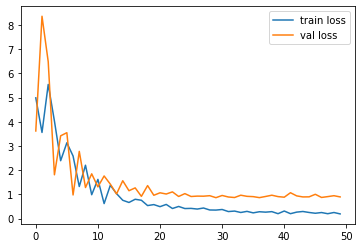

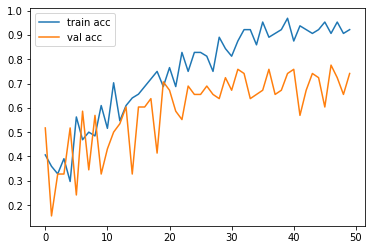

<Figure size 432x288 with 0 Axes>

In [17]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
 # saving model as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [19]:
# Let's do the prediction
y_pred = model.predict(test_set)


2/2 [==============================] - 1s 100ms/step


In [20]:
y_pred[:1]

array([[0.00880527, 0.94442517, 0.04676967]], dtype=float32)

In [21]:
import numpy as np
y_pred = np.argmax(y_pred, axis=0)

In [22]:
y_pred

array([32,  5,  1])

In [23]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [24]:
model=load_model('model_resnet50.h5')

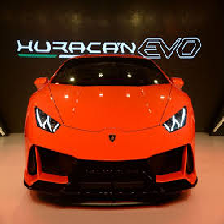

In [25]:
img=image.load_img('/content/drive/MyDrive/Datasets/Test/lamborghini/10.jpg',target_size=(224,224))

img

In [26]:
x=image.img_to_array(img)
x

array([[[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        ...,
        [ 13.,   2.,   0.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 18.,   8.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 18.,   8.,   0.],
        [ 18.,   8.,   0.],
        [ 19.,   9.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       ...,

       [[209., 129.,  92.],
        [210., 130.,  93.],
        [212., 132.,  95.],
        ...,
        [216., 132.,  96.],
        [214., 129.,  92.],
        [213., 129.,  92.]],

       [[208., 128.,  91.],
        [208., 128.,  91.],
        [211., 131.,  94.],
        ...,
        [215., 131.,  95.],
        [209., 129.,  94.],
        [207., 129.,  93.]],

       [[206., 128.,  90.],
        [206., 128.,  90.],
        [209., 1

In [27]:
x.shape

(224, 224, 3)

In [28]:
x=x/255

In [29]:
x = np.expand_dims(x, axis = 0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [30]:
model.predict(img_data)

1/1 [==============================] - 1s 1s/step


array([[0.00702481, 0.16156438, 0.8314109 ]], dtype=float32)

In [31]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 31ms/step


In [32]:
a==1

array([False])